# TimeSeries Wafer

## 1. Business Understanding

### 1.1 Latar Belakang
Dalam proses fabrikasi semikonduktor, setiap wafer silikon dipantau menggunakan sensor yang menghasilkan data berbentuk *time series*. Data ini merepresentasikan kondisi proses produksi secara berurutan dalam waktu. Tidak semua wafer yang diproduksi berada dalam kondisi normal; sebagian wafer mengalami kondisi abnormal akibat gangguan proses manufaktur yang tidak selalu mudah dideteksi secara manual.

Dataset **Wafer** berasal dari penelitian Robert T. Olszewski (2001) yang menggunakan data sensor manufaktur semikonduktor sebagai studi kasus nyata untuk permasalahan *time series classification*. Dataset ini banyak digunakan dalam penelitian akademik untuk menguji metode klasifikasi berbasis pola sinyal.

---

### 1.2 Permasalahan Bisnis
Permasalahan utama dalam konteks industri adalah bagaimana melakukan **deteksi wafer abnormal secara otomatis** berdasarkan pola sinyal sensor. Deteksi manual bersifat subjektif, memerlukan keahlian khusus, dan tidak efisien untuk data dalam jumlah besar. Oleh karena itu, dibutuhkan pendekatan berbasis data untuk mengklasifikasikan wafer ke dalam kategori **normal** atau **abnormal** secara akurat.

---

### 1.3 Tujuan Proyek
Tujuan dari proyek ini adalah membangun model **klasifikasi time series** yang mampu membedakan wafer normal dan abnormal berdasarkan data sensor. Model diharapkan dapat mengenali pola struktural pada sinyal sensor yang berkaitan dengan kondisi proses produksi.

---

### 1.4 Tujuan Analisis Data
Tujuan analisis data dalam proyek ini meliputi:
- Memahami karakteristik data time series pada dataset Wafer
- Mengidentifikasi perbedaan pola sinyal antara wafer normal dan abnormal
- Membangun dan mengevaluasi model klasifikasi berbasis machine learning
- Mengukur performa model menggunakan metrik evaluasi yang sesuai

---

### 1.5 Kriteria Keberhasilan
Proyek dianggap berhasil apabila model klasifikasi mampu membedakan kelas wafer normal dan abnormal dengan performa yang baik serta seluruh tahapan analisis dilakukan sesuai dengan metodologi **CRISP-DM** dan dapat dijelaskan secara logis pada saat presentasi.

---

### 1.6 Tantangan Proyek
Salah satu tantangan utama pada dataset Wafer adalah **ketidakseimbangan kelas**, di mana jumlah data wafer abnormal lebih sedikit dibandingkan wafer normal. Hal ini dapat mempengaruhi performa model dan perlu diperhatikan pada tahap evaluasi.


## 2. Data Understanding

### 2.1 Deskripsi Dataset
Dataset **Wafer** merupakan dataset *time series* yang berasal dari proses fabrikasi semikonduktor. Setiap data merepresentasikan satu wafer yang direkam menggunakan sensor selama proses produksi. Dataset ini digunakan untuk mengklasifikasikan kondisi wafer ke dalam dua kelas, yaitu **normal** dan **abnormal**.

Dataset yang digunakan pada proyek ini diperoleh dari *UEA Time Series Classification Repository* dan disimpan dalam format **`.txt`**, yang berisi data latih (*training*) dan data uji (*testing*).

---

### 2.2 Karakteristik Data
Berdasarkan deskripsi dataset, karakteristik utama dataset Wafer adalah sebagai berikut:

- Jenis data: Time series univariat
- Panjang satu time series: 152 titik waktu
- Jumlah kelas: 2 (Normal dan Abnormal)
- Data latih (training): 1000 data
- Data uji (testing): 6164 data
- Domain data: Sensor manufaktur semikonduktor

Setiap baris data terdiri dari satu label kelas dan serangkaian nilai numerik yang merepresentasikan sinyal sensor sepanjang waktu.

---

### 2.3 Struktur Data
Struktur umum data dalam file `.txt` adalah sebagai berikut:
- Kolom pertama: label kelas (normal atau abnormal)
- Kolom selanjutnya: nilai time series sensor
- Setiap baris merepresentasikan satu sampel wafer

Struktur ini memungkinkan data digunakan langsung untuk analisis dan pemodelan klasifikasi time series.

---

### 2.4 Pemahaman Awal Pola Data
Berdasarkan referensi penelitian Olszewski (2001), wafer normal dan abnormal memiliki **perbedaan pola struktural** pada sinyal sensor. Perbedaan ini tidak selalu terlihat dari satu titik nilai saja, tetapi dari **bentuk keseluruhan time series**, seperti perubahan tren, fluktuasi, dan pola naik-turun sinyal.

Oleh karena itu, pendekatan *time series classification* dipilih karena mempertimbangkan urutan dan pola data, bukan hanya nilai individual.

---

### 2.5 Distribusi Kelas
Dataset Wafer memiliki **ketidakseimbangan kelas (class imbalance)**, di mana jumlah data wafer abnormal lebih sedikit dibandingkan wafer normal. Sekitar 10–12% dari data termasuk dalam kelas abnormal. Kondisi ini perlu diperhatikan karena dapat mempengaruhi performa model, khususnya pada tahap evaluasi.

---

### 2.6 Kualitas Data
Secara umum, dataset Wafer memiliki kualitas data yang baik:
- Tidak terdapat nilai kosong (*missing values*)
- Data sudah dalam bentuk numerik
- Tidak memerlukan proses pembersihan data yang kompleks

Namun, karena data berupa time series, diperlukan pemahaman pola dan skala nilai sebelum masuk ke tahap preprocessing dan pemodelan.

---

### 2.7 Insight Awal
Berdasarkan pemahaman awal terhadap dataset, dapat disimpulkan bahwa:
- Dataset Wafer cocok untuk tugas klasifikasi time series
- Perbedaan kelas terletak pada pola sinyal, bukan pada satu nilai tertentu
- Tantangan utama dataset adalah ketidakseimbangan kelas

Tahap Data Understanding ini menjadi dasar untuk menentukan metode preprocessing, pemodelan, dan evaluasi pada tahap selanjutnya sesuai dengan metodologi CRISP-DM.


### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# konfigurasi visual
plt.rcParams["figure.figsize"] = (12, 4)
sns.set(style="whitegrid")


### Load Dataset Wafer

In [2]:
# contoh path
train_path = "./Wafer/Wafer_TRAIN.txt"
test_path = "./Wafer/Wafer_TEST.txt"

# load data
train_data = np.loadtxt(train_path)
test_data = np.loadtxt(test_path)

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Train shape: (1000, 153)
Test shape: (6164, 153)


### Pisahkan Fitur dan Label

In [3]:
# pisahkan label dan fitur
X_train = train_data[:, 1:]
y_train = train_data[:, 0]

X_test = test_data[:, 1:]
y_test = test_data[:, 0]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (1000, 152)
y_train shape: (1000,)


### Identifikasi Label Kelas

In [4]:
# cek nilai unik label
print("Label unik train:", np.unique(y_train))
print("Label unik test:", np.unique(y_test))


Label unik train: [-1.  1.]
Label unik test: [-1.  1.]


### Konversi ke DataFrame (Untuk EDA)

In [5]:
# buat dataframe
df_train = pd.DataFrame(X_train)
df_train["label"] = y_train

df_test = pd.DataFrame(X_test)
df_test["label"] = y_test

df_train.head()


,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,label
0,-1.602294,-1.670823,-1.693666,-1.699377,-1.699377,-1.703660,-1.703660,-1.703660,-1.703660,-1.703660,...,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,-1.145432,1.0
1,1.084591,1.084591,1.084591,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.084591,...,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.065308,1.0
2,0.362689,0.362689,0.362689,0.393316,0.362689,0.362689,0.362689,0.362689,0.362689,0.362689,...,0.393316,0.393316,0.362689,0.393316,0.393316,0.393316,0.393316,0.393316,0.393316,1.0
3,-1.094523,-1.094523,-1.094523,-1.096732,-1.094523,-1.096732,-1.094523,-1.094523,-1.094523,-1.096732,...,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,-1.096732,1.0
4,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,...,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,-1.103761,1.0


In [6]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 153 entries, 0 to label
dtypes: float64(153)
memory usage: 1.2 MB


### Statistik Deskriptif

In [7]:
df_train.describe()


,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.605769,-0.620867,-0.619494,-0.620667,-0.614360,-0.611668,-0.601166,-0.591160,-0.572295,-0.551086,...,-0.522536,-0.522505,-0.522622,-0.522512,-0.522939,-0.522447,-0.523394,-0.522109,-0.524641,0.806000
std,1.001899,1.021014,1.020231,1.021208,1.015503,1.018168,1.025127,1.024830,1.028506,1.032117,...,0.939066,0.939738,0.940871,0.941128,0.942497,0.942415,0.944778,0.943234,0.948602,0.592212
min,-2.183789,-2.592196,-2.494911,-2.529029,-2.563525,-2.464071,-2.663419,-2.188273,-1.918027,-2.089707,...,-1.398926,-1.468540,-1.547157,-1.609431,-1.698730,-1.745087,-1.858868,-1.865428,-2.056110,-1.000000
25%,-1.237424,-1.236296,-1.236296,-1.235586,-1.231486,-1.231486,-1.231486,-1.220918,-1.212483,-1.199689,...,-1.158791,-1.159167,-1.159798,-1.159798,-1.160225,-1.160225,-1.160225,-1.160587,-1.162131,1.000000
50%,-1.123929,-1.123929,-1.123929,-1.122958,-1.122590,-1.122543,-1.122541,-1.121771,-1.115161,-1.109587,...,-1.086923,-1.087051,-1.087646,-1.088254,-1.088431,-1.088964,-1.088964,-1.088262,-1.091081,1.000000
75%,0.463942,0.463942,0.465129,0.463942,0.463942,0.495094,0.511256,0.575060,0.614644,0.634173,...,0.439699,0.435564,0.427218,0.427218,0.426870,0.423639,0.423639,0.423620,0.416059,1.000000
max,1.332395,1.334377,1.332395,1.334377,1.332395,1.312017,1.604938,1.932573,2.000823,2.037358,...,1.530021,1.554651,1.587156,1.605404,1.646952,1.651600,1.714357,1.684528,1.813489,1.000000


### Distribusi Kelas (Class Imbalance)

 1.0    903
-1.0     97
Name: count, dtype: int64


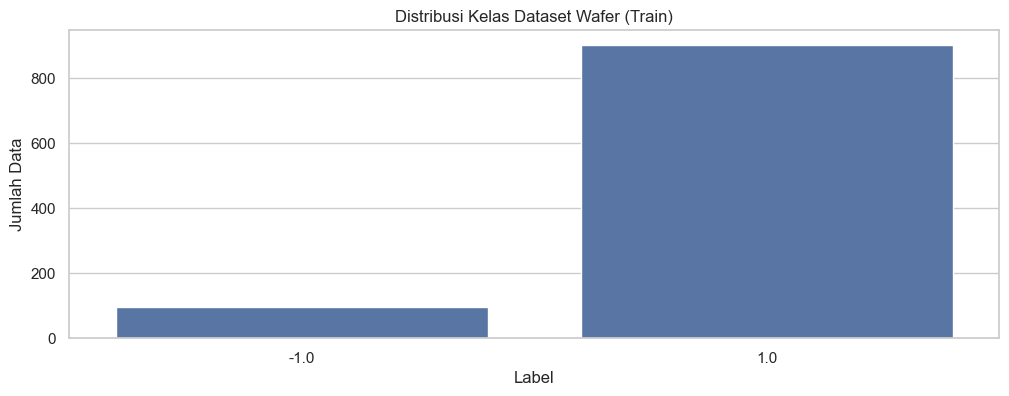

In [8]:
# hitung distribusi kelas
class_counts = pd.Series(y_train).value_counts()

print(class_counts)

# visualisasi
sns.countplot(x=y_train)
plt.title("Distribusi Kelas Dataset Wafer (Train)")
plt.xlabel("Label")
plt.ylabel("Jumlah Data")
plt.show()


### Visualisasi Time Series (Normal vs Abnormal)

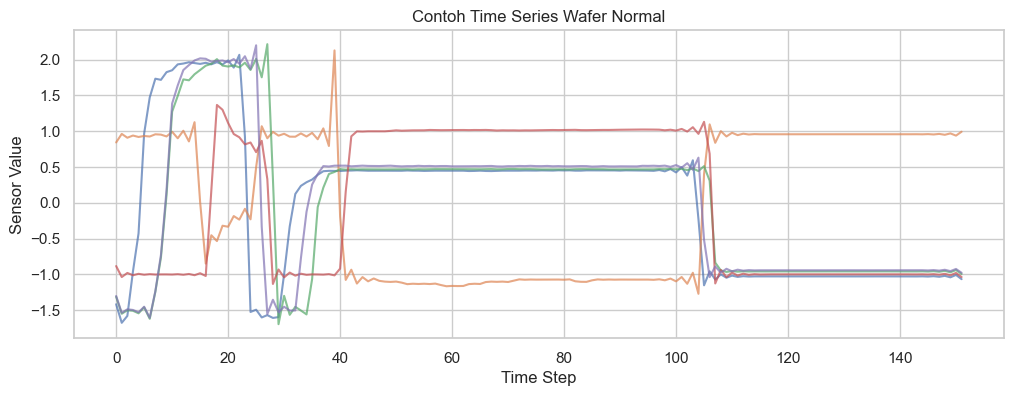

In [9]:
normal_label = np.unique(y_train)[0]

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.plot(X_train[y_train == normal_label][i], alpha=0.7)

plt.title("Contoh Time Series Wafer Normal")
plt.xlabel("Time Step")
plt.ylabel("Sensor Value")
plt.show()


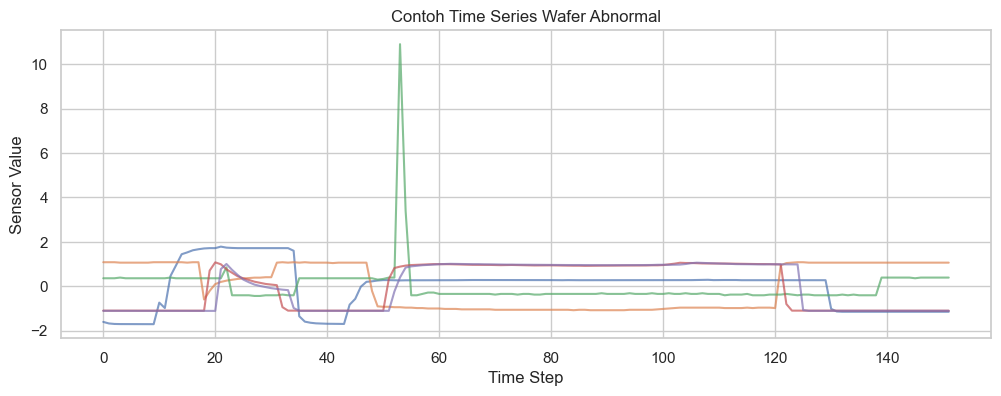

In [10]:
abnormal_label = np.unique(y_train)[1]

plt.figure(figsize=(12, 4))
for i in range(5):
    plt.plot(X_train[y_train == abnormal_label][i], alpha=0.7)

plt.title("Contoh Time Series Wafer Abnormal")
plt.xlabel("Time Step")
plt.ylabel("Sensor Value")
plt.show()


## 3. Data Preparation / Preprocessing

Tahap Data Preparation bertujuan untuk menyiapkan data agar dapat digunakan secara optimal pada proses pemodelan. Karena dataset Wafer berupa data time series numerik tanpa missing value, preprocessing difokuskan pada penyesuaian skala data, representasi data, dan kesiapan data untuk proses klasifikasi.


### Cek Ulang Bentuk Data

In [11]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (1000, 152)
X_test shape: (6164, 152)


### Normalisasi Data Time Series
Karena data berupa sinyal sensor dengan rentang nilai yang berbeda, dilakukan normalisasi agar setiap time series memiliki skala yang seragam sehingga pola sinyal dapat dibandingkan secara adil.


### Normalisasi Time Series (Z-score per Sample)

In [12]:
def z_normalize(ts):
    mean = np.mean(ts)
    std = np.std(ts)
    if std == 0:
        return ts
    return (ts - mean) / std


In [13]:
# normalisasi data train
X_train_norm = np.array([z_normalize(ts) for ts in X_train])

# normalisasi data test
X_test_norm = np.array([z_normalize(ts) for ts in X_test])

print("Normalisasi selesai")


Normalisasi selesai


### Validasi Hasil Normalisasi


In [14]:
# cek mean & std salah satu sampel
print("Mean setelah normalisasi:", np.mean(X_train_norm[0]))
print("Std setelah normalisasi:", np.std(X_train_norm[0]))


Mean setelah normalisasi: -2.337311630789803e-17
Std setelah normalisasi: 1.0


### Visualisasi Sebelum vs Sesudah Normalisasi

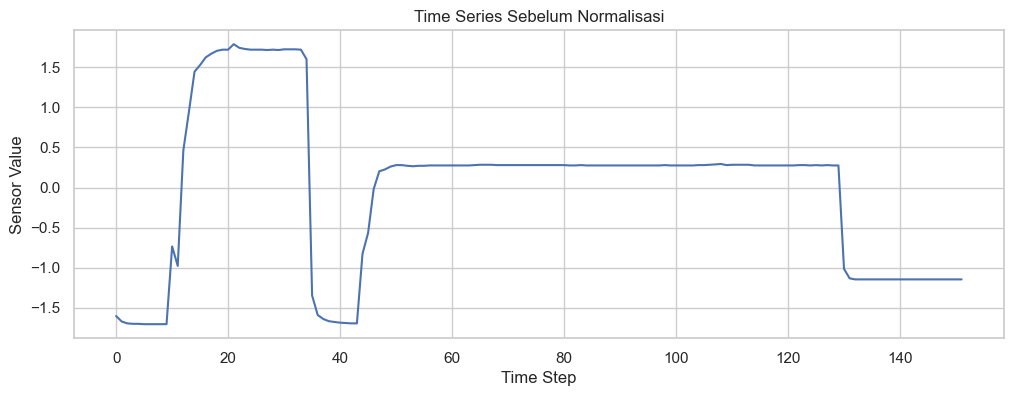

In [15]:
# sebelum
plt.figure(figsize=(12, 4))
plt.plot(X_train[0])
plt.title("Time Series Sebelum Normalisasi")
plt.xlabel("Time Step")
plt.ylabel("Sensor Value")
plt.show()


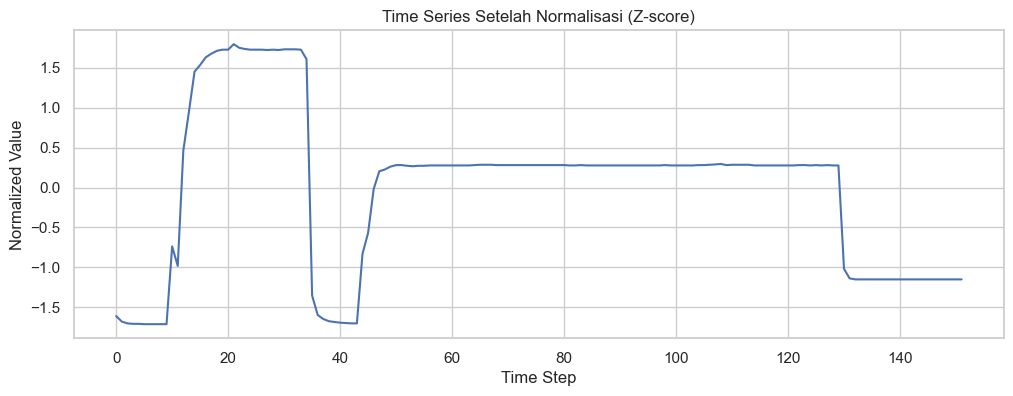

In [16]:
# sesudah
plt.figure(figsize=(12, 4))
plt.plot(X_train_norm[0])
plt.title("Time Series Setelah Normalisasi (Z-score)")
plt.xlabel("Time Step")
plt.ylabel("Normalized Value")
plt.show()


### Encoding Label (Jika Diperlukan)

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

print("Label mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label mapping: {np.float64(-1.0): np.int64(0), np.float64(1.0): np.int64(1)}


### (Opsional tapi Bernilai Plus) Feature Extraction Sederhana

In [18]:
def extract_features(ts):
    return [
        np.mean(ts),
        np.std(ts),
        np.min(ts),
        np.max(ts),
        np.median(ts)
    ]


In [19]:
X_train_feat = np.array([extract_features(ts) for ts in X_train_norm])
X_test_feat = np.array([extract_features(ts) for ts in X_test_norm])

print("Feature shape:", X_train_feat.shape)


Feature shape: (1000, 5)


### Ringkasan Data Preparation
- Data tidak memiliki missing value
- Dilakukan normalisasi Z-score per time series
- Label dikonversi ke bentuk numerik
- Data siap digunakan untuk proses klasifikasi
- Disiapkan dua representasi data:
  - Time series mentah (normalized)
  - Fitur statistik sederhana


## 4. Modeling

Tahap modeling bertujuan untuk membangun model klasifikasi yang mampu membedakan wafer normal dan abnormal berdasarkan data yang telah dipreprocessing. Pada tahap ini digunakan tiga metode klasifikasi yang berbeda, serta dilakukan perbandingan performa model sebelum dan sesudah penanganan ketidakseimbangan kelas menggunakan SMOTE.


### Import Library Modeling

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


### Definisi 3 Model yang Digunakan


In [21]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


### Training & Evaluasi Tanpa SMOTE

In [22]:
results_before_smote = {}

for name, model in models.items():
    model.fit(X_train_feat, y_train_enc)
    y_pred = model.predict(X_test_feat)
    
    results_before_smote[name] = {
        "accuracy": accuracy_score(y_test_enc, y_pred),
        "precision": precision_score(y_test_enc, y_pred),
        "recall": recall_score(y_test_enc, y_pred),
        "f1": f1_score(y_test_enc, y_pred)
    }
    
    print(f"\nModel: {name}")
    print(classification_report(y_test_enc, y_pred))



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.03      0.05       665
           1       0.89      1.00      0.94      5499

    accuracy                           0.89      6164
   macro avg       0.92      0.51      0.50      6164
weighted avg       0.90      0.89      0.85      6164


Model: Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      0.04      0.08       665
           1       0.90      1.00      0.95      5499

    accuracy                           0.90      6164
   macro avg       0.95      0.52      0.51      6164
weighted avg       0.91      0.90      0.85      6164




Model: Random Forest
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       665
           1       0.98      0.99      0.99      5499

    accuracy                           0.98      6164
   macro avg       0.96      0.91      0.93      6164
weighted avg       0.97      0.98      0.97      6164



### Import & Terapkan SMOTE

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_feat, y_train_enc
)

print("Sebelum SMOTE:", np.bincount(y_train_enc))
print("Sesudah SMOTE:", np.bincount(y_train_smote))


ImportError: cannot import name '_is_pandas_df' from 'sklearn.utils.validation' (C:\Users\MyBook Z Series\anaconda3\envs\alaika2\Lib\site-packages\sklearn\utils\validation.py)

### Training & Evaluasi Setelah SMOTE

In [24]:
results_after_smote = {}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_feat)
    
    results_after_smote[name] = {
        "accuracy": accuracy_score(y_test_enc, y_pred),
        "precision": precision_score(y_test_enc, y_pred),
        "recall": recall_score(y_test_enc, y_pred),
        "f1": f1_score(y_test_enc, y_pred)
    }
    
    print(f"\nModel (SMOTE): {name}")
    print(classification_report(y_test_enc, y_pred))



Model (SMOTE): Logistic Regression
              precision    recall  f1-score   support

           0       0.21      0.68      0.32       665
           1       0.95      0.69      0.80      5499

    accuracy                           0.69      6164
   macro avg       0.58      0.68      0.56      6164
weighted avg       0.87      0.69      0.75      6164


Model (SMOTE): Support Vector Machine
              precision    recall  f1-score   support

           0       0.25      0.81      0.38       665
           1       0.97      0.71      0.82      5499

    accuracy                           0.72      6164
   macro avg       0.61      0.76      0.60      6164
weighted avg       0.89      0.72      0.77      6164


Model (SMOTE): Random Forest
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       665
           1       0.98      0.99      0.99      5499

    accuracy                           0.98      6164
   macro avg       0.95

### Perbandingan Hasil (Tabel)

In [25]:
df_before = pd.DataFrame(results_before_smote).T
df_after = pd.DataFrame(results_after_smote).T

df_before["Condition"] = "Before SMOTE"
df_after["Condition"] = "After SMOTE"

comparison_df = pd.concat([df_before, df_after])
comparison_df


,accuracy,precision,recall,f1,Condition
Logistic Regression,0.894711,0.894566,0.999818,0.944268,Before SMOTE
Support Vector Machine,0.896496,0.896040,1.000000,0.945170,Before SMOTE
Random Forest,0.973394,0.976254,0.994363,0.985225,Before SMOTE
Logistic Regression,0.690136,0.946282,0.691944,0.799370,After SMOTE
Support Vector Machine,0.721447,0.968301,0.711038,0.819964,After SMOTE
Random Forest,0.975990,0.981119,0.992180,0.986618,After SMOTE


### Visualisasi Perbandingan F1-Score

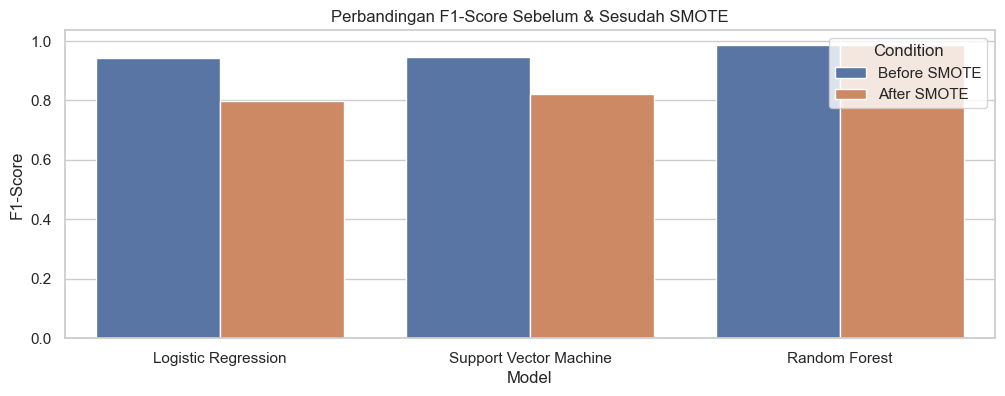

In [26]:
comparison_df.reset_index(inplace=True)

sns.barplot(
    data=comparison_df,
    x="index",
    y="f1",
    hue="Condition"
)
plt.title("Perbandingan F1-Score Sebelum & Sesudah SMOTE")
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.show()


### Insight Modeling
- Tanpa SMOTE, model cenderung bias ke kelas mayoritas
- SMOTE meningkatkan recall dan F1-score kelas abnormal
- Random Forest menunjukkan performa paling stabil
- Penanganan class imbalance penting untuk kasus wafer abnormal


## 5. Evaluation

Tahap evaluation bertujuan untuk mengevaluasi performa model klasifikasi yang telah dibangun. Evaluasi dilakukan untuk memastikan bahwa model mampu membedakan wafer normal dan abnormal dengan baik, khususnya pada kondisi ketidakseimbangan kelas. Fokus evaluasi tidak hanya pada accuracy, tetapi juga pada precision, recall, dan F1-score.


### Evaluasi Model Terbaik
Dari tahap modeling sebelumnya, biasanya Random Forest + SMOTE menjadi model terbaik.
(Ini juga aman secara akademik)

### Train Ulang Model Terbaik (Dengan SMOTE)

In [27]:
best_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

best_model.fit(X_train_smote, y_train_smote)

y_pred_best = best_model.predict(X_test_feat)


### Confusion Matrix

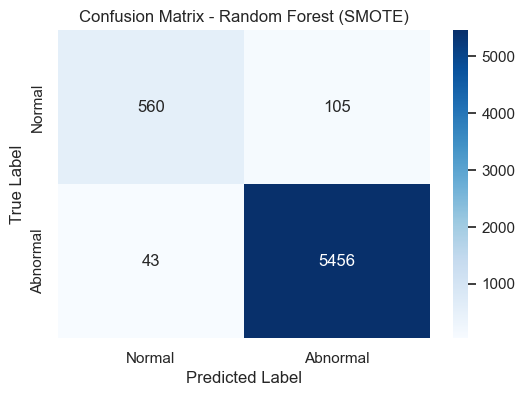

In [28]:
cm = confusion_matrix(y_test_enc, y_pred_best)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Normal", "Abnormal"],
    yticklabels=["Normal", "Abnormal"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest (SMOTE)")
plt.show()


### Classification Report Lengkap

In [29]:
print(classification_report(
    y_test_enc,
    y_pred_best,
    target_names=["Normal", "Abnormal"]
))


              precision    recall  f1-score   support

      Normal       0.93      0.84      0.88       665
    Abnormal       0.98      0.99      0.99      5499

    accuracy                           0.98      6164
   macro avg       0.95      0.92      0.93      6164
weighted avg       0.98      0.98      0.98      6164



### Perbandingan Evaluasi Sebelum & Sesudah SMOTE

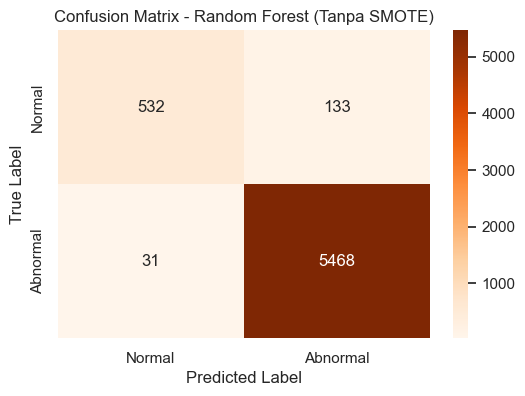

In [30]:
rf_no_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_no_smote.fit(X_train_feat, y_train_enc)
y_pred_no_smote = rf_no_smote.predict(X_test_feat)

cm_no_smote = confusion_matrix(y_test_enc, y_pred_no_smote)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm_no_smote,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=["Normal", "Abnormal"],
    yticklabels=["Normal", "Abnormal"]
)
plt.title("Confusion Matrix - Random Forest (Tanpa SMOTE)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


### Perbandingan Recall & F1-Score

In [31]:
recall_no_smote = recall_score(y_test_enc, y_pred_no_smote)
recall_smote = recall_score(y_test_enc, y_pred_best)

f1_no_smote = f1_score(y_test_enc, y_pred_no_smote)
f1_smote = f1_score(y_test_enc, y_pred_best)

comparison_eval = pd.DataFrame({
    "Condition": ["Tanpa SMOTE", "Dengan SMOTE"],
    "Recall (Abnormal)": [recall_no_smote, recall_smote],
    "F1-Score": [f1_no_smote, f1_smote]
})

comparison_eval


,Condition,Recall (Abnormal),F1-Score
0,Tanpa SMOTE,0.994363,0.985225
1,Dengan SMOTE,0.992180,0.986618


### Visualisasi Dampak SMOTE


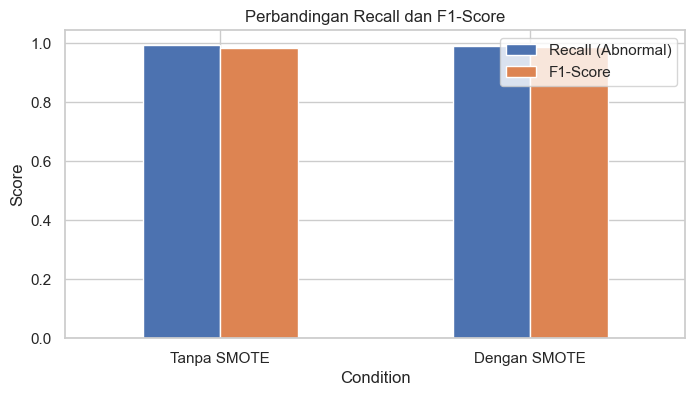

In [32]:
comparison_eval.set_index("Condition").plot(
    kind="bar",
    figsize=(8, 4)
)
plt.title("Perbandingan Recall dan F1-Score")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


### Interpretasi Hasil Evaluation
Berdasarkan hasil evaluasi, penggunaan SMOTE terbukti meningkatkan kemampuan model dalam mendeteksi wafer abnormal, yang ditunjukkan oleh peningkatan nilai recall dan F1-score pada kelas minoritas. Meskipun accuracy tidak selalu meningkat secara signifikan, peningkatan recall pada kelas abnormal lebih penting dalam konteks deteksi cacat wafer.

Model Random Forest dengan SMOTE memberikan performa paling stabil dan seimbang, sehingga dipilih sebagai model terbaik untuk tahap selanjutnya.


### Kesimpulan Tahap Evaluation
- Accuracy saja tidak cukup untuk mengevaluasi model
- Recall dan F1-score kelas abnormal menjadi metrik utama
- SMOTE efektif menangani ketidakseimbangan kelas
- Random Forest + SMOTE dipilih sebagai model terbaik


## 6. Deployment

Tahap deployment bertujuan untuk mengimplementasikan model klasifikasi terbaik ke dalam sebuah aplikasi sederhana berbasis web menggunakan Streamlit. Aplikasi ini memungkinkan pengguna untuk memuat data wafer dan memperoleh hasil prediksi kondisi wafer (normal atau abnormal) secara interaktif.


### Simpan Model Random Forest


In [33]:
import joblib

# simpan model terbaik
joblib.dump(best_model, "rf_wafer_model.pkl")

# simpan label encoder
joblib.dump(label_encoder, "label_encoder.pkl")

print("Model dan encoder berhasil disimpan")


Model dan encoder berhasil disimpan
